# **LipSync.ai**

In [ ]:
##PROJECT TITLE - TRANSCRIPTION SERVICE
## ANANT SHARMA - RA2111026010115
## SARTHAL DEVIWEDI - RA2111026010122

**Introduction:**
In a world striving for inclusivity, accessibility is paramount. Communication barriers can isolate individuals from fully participating in society. Recognizing this, our project seeks to harness the power of machine learning to break down one such barrier: the communication gap between the hearing-impaired and others.

**Objective:**
Our aim is to develop an advanced lip reading model using state-of-the-art deep learning techniques. By leveraging computer vision and deep neural networks, we endeavor to create a tool that not only enhances accessibility for the hearing-impaired but also empowers society to utilize machine learning for positive impact.

**Technological Foundation:**
Our project integrates cutting-edge technologies, including OpenCV for video input processing, TensorFlow for building and training the deep learning model, and a client-conversation format for user interaction. We utilize Gdown for data acquisition and preprocessing, ensuring seamless integration and efficiency in our workflow.

**Model Architecture:**
The core of our system lies in a deep neural network, employing 3D convolutions to extract meaningful features from video input. This architecture allows us to condense complex visual data into a classification dense layer, predicting characters accurately. To optimize training and inference, we incorporate a specialized loss function known as Connectionist Temporal Classification (CTC).

**Data Pipeline and Training:**
A robust data pipeline, developed using TensorFlow, ensures smooth data flow from acquisition to model training. By automating data preprocessing and feeding it into the training pipeline, we streamline the development process. This approach not only enhances efficiency but also ensures scalability and reproducibility.

**Outcome:**
The culmination of our efforts is a powerful lip reading model capable of converting video input into corresponding text. By harnessing the synergy of advanced machine learning techniques, we bridge the communication gap, fostering inclusivity and empowerment within our society.

**Inferencing:**
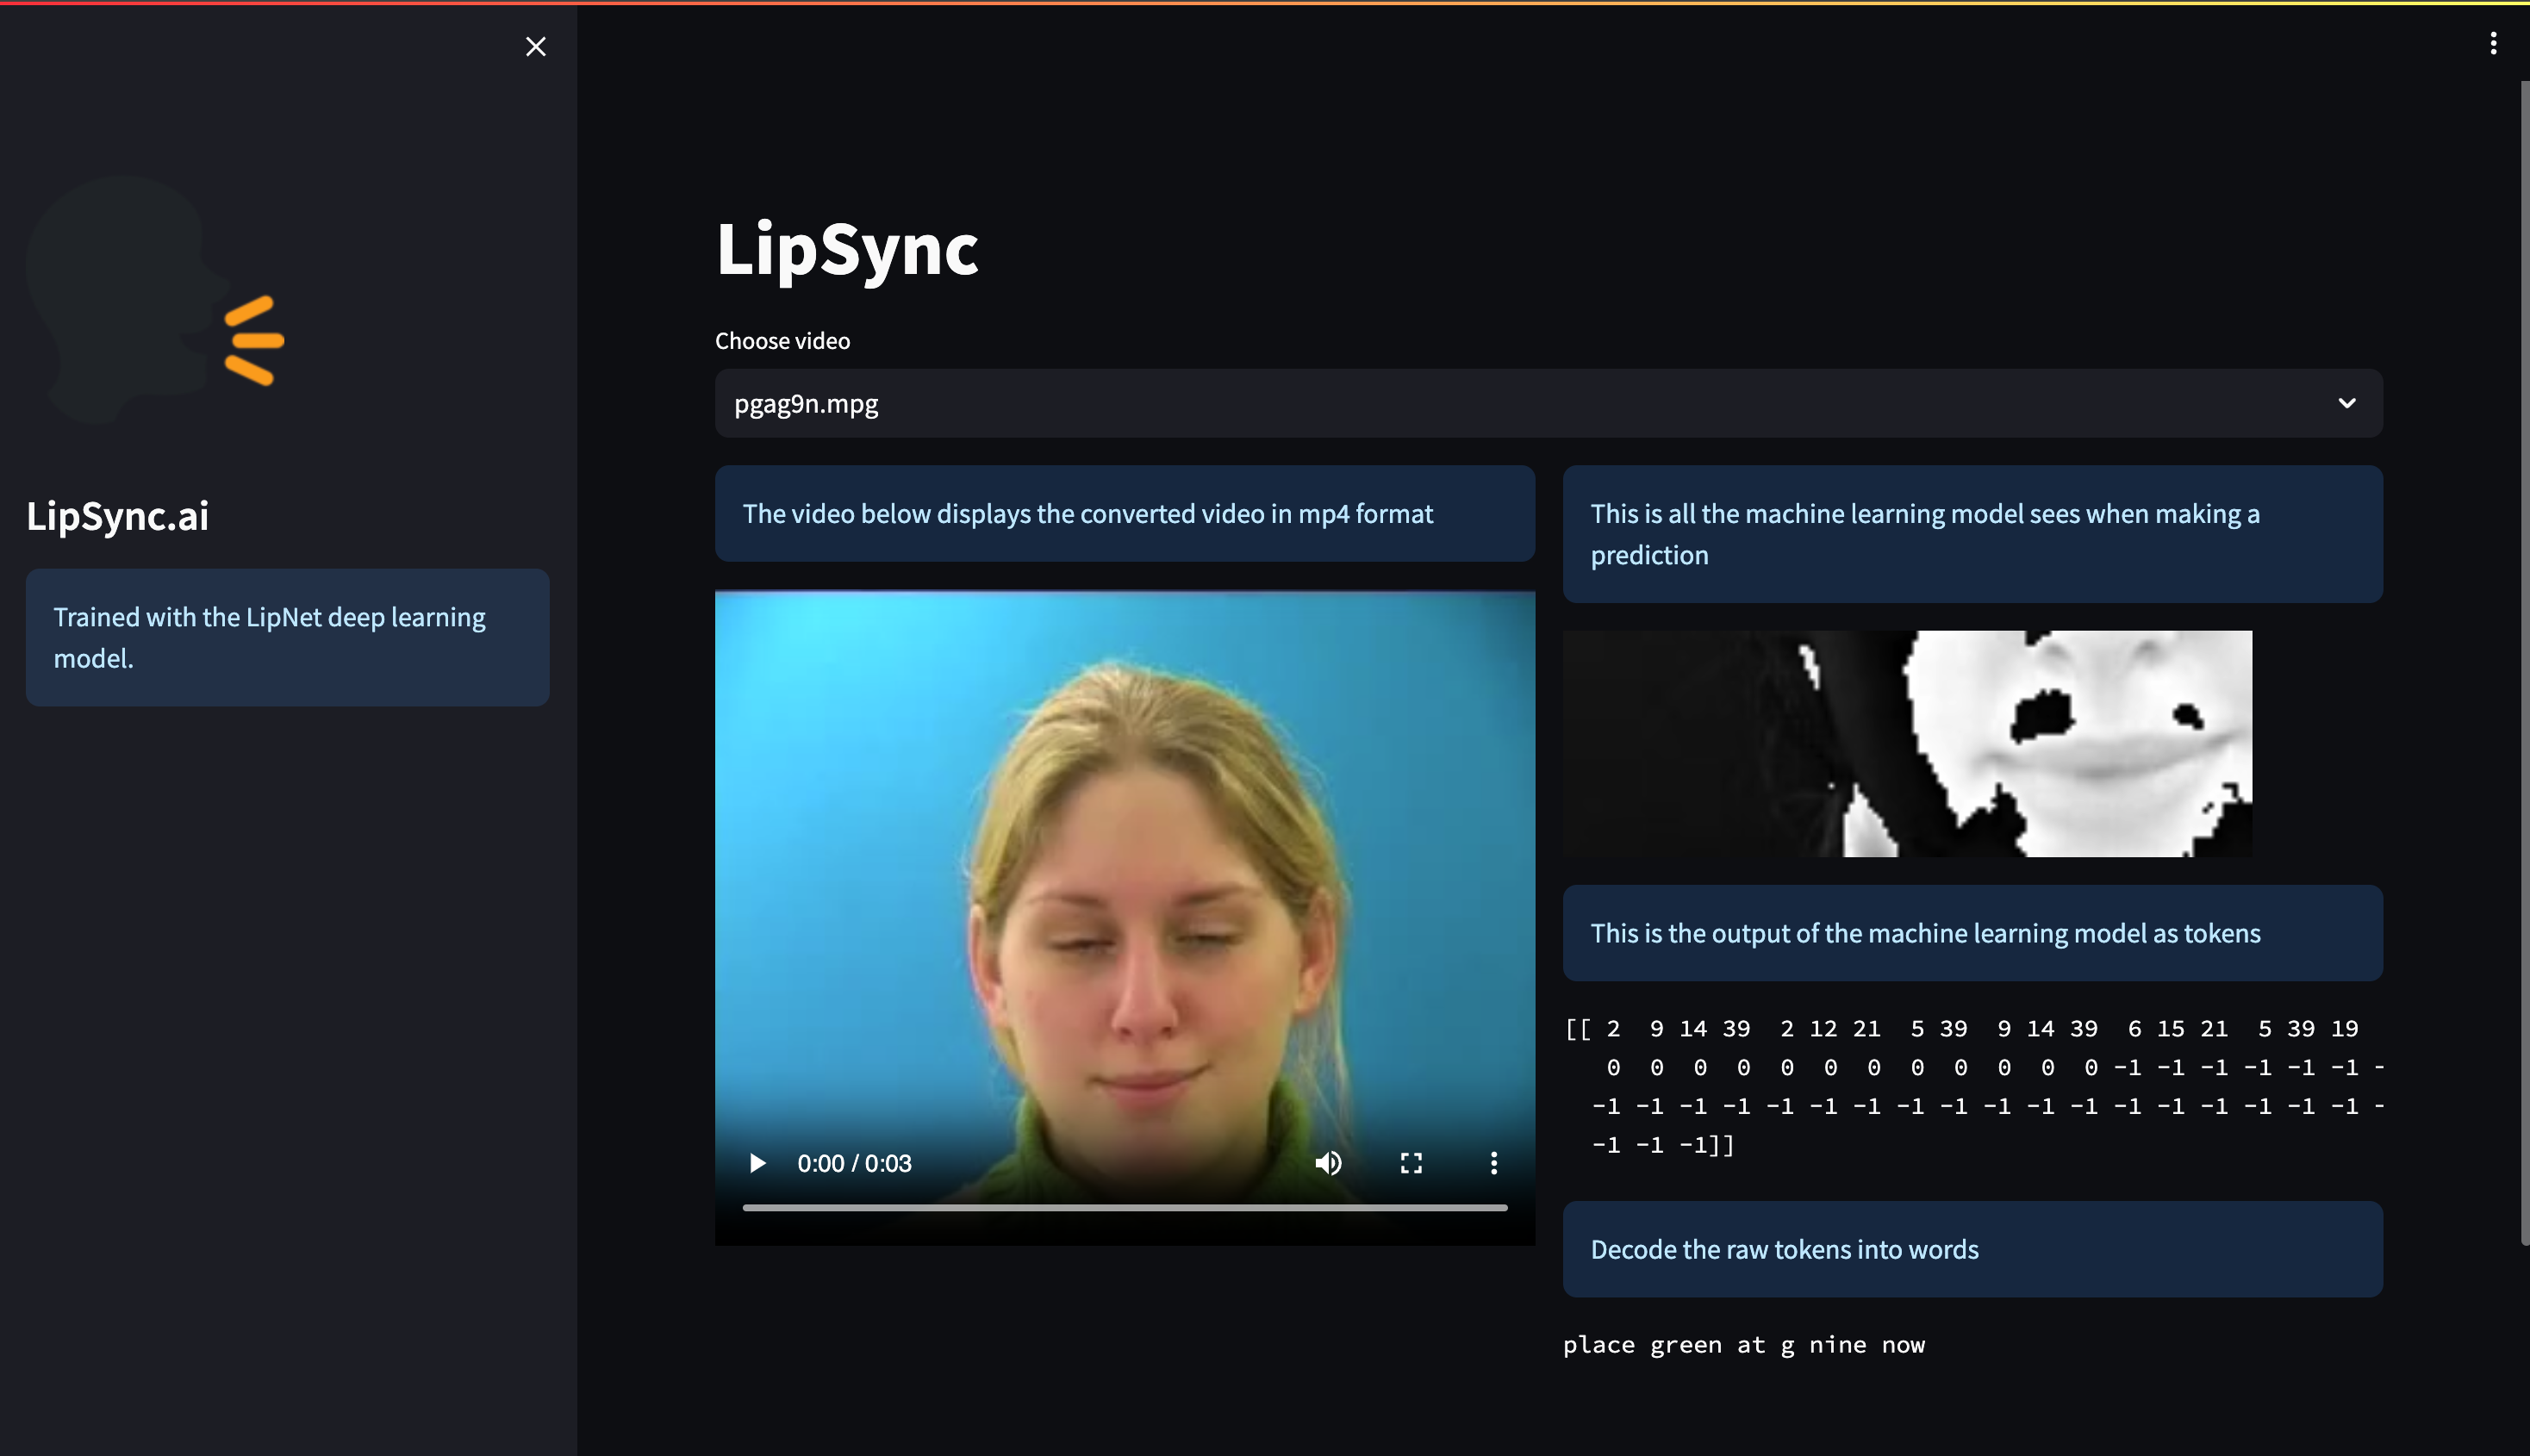

**Refernces:**
*  https://arxiv.org/pdf/1611.01599.pdf?uuid=Fqbse38nqebdFpys3035
*  https://keras.io/examples/audio/ctc_asr/
*  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv3D


# **0. Install and import Dependencies**

In [1]:
! pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [2]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [3]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [83]:
tf.config.list_physical_devices('GPU')

[]

In [84]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# **1. Build Data Loading Functions**

In [6]:
import gdown

In [7]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=5298900d-7d50-4536-aa21-afb028a70af0
To: /content/data.zip
100%|██████████| 423M/423M [00:02<00:00, 160MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [8]:
def load_video(path:str) -> List[float]:
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [9]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [10]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [11]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)
print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [12]:
char_to_num(['w','c','g','z'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([23,  3,  7, 26])>

In [13]:
num_to_char([23, 3, 7, 26])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'w', b'c', b'g', b'z'], dtype=object)>

In [14]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [15]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [16]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)
    return frames, alignments

In [17]:
test_path = '/content/data/s1/bbal6n.mpg'

In [18]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [19]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

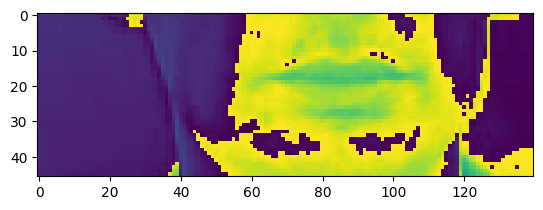

In [20]:
plt.imshow(frames[2])

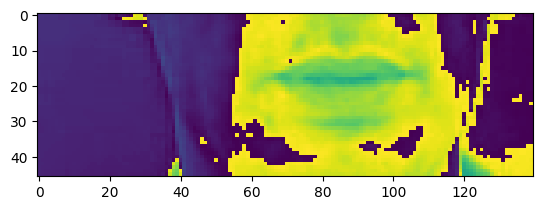

In [21]:
plt.imshow(frames[17])

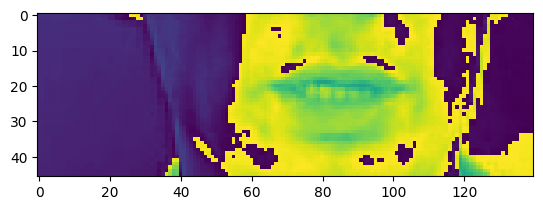

In [22]:
plt.imshow(frames[29])

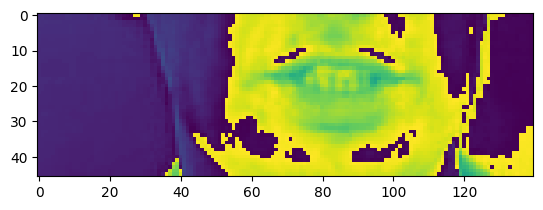

In [23]:
plt.imshow(frames[35])

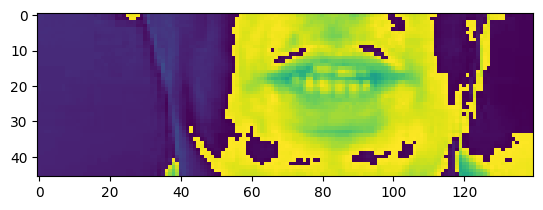

In [24]:
plt.imshow(frames[40])

In [25]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [26]:
print([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

['b', 'i', 'n', ' ', 'b', 'l', 'u', 'e', ' ', 'a', 't', ' ', 'l', ' ', 's', 'i', 'x', ' ', 'n', 'o', 'w']


In [27]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [28]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# **2. Create data Pipeline**

In [29]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
train = data.take(450)
test = data.skip(450)

In [30]:
len(test)

50

In [31]:
frames, alignments = data.as_numpy_iterator().next()

In [32]:
len(frames)

2

In [33]:
alignments

array([[ 2,  9, 14, 39, 18,  5,  4, 39, 23,  9, 20,  8, 39,  7, 39, 19,
         9, 24, 39, 14, 15, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [19,  5, 20, 39,  7, 18,  5,  5, 14, 39,  9, 14, 39,  3, 39, 26,
         5, 18, 15, 39, 16, 12,  5,  1, 19,  5,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [34]:
sample = data.as_numpy_iterator()

In [35]:
val = sample.next(); val[0]

array([[[[[ 1.3772625 ],
          [ 1.3772625 ],
          [ 1.3772625 ],
          ...,
          [ 0.4328539 ],
          [ 0.23610213],
          [ 9.365384  ]],

         [[ 1.3772625 ],
          [ 1.3772625 ],
          [ 1.3772625 ],
          ...,
          [ 0.23610213],
          [ 9.640837  ],
          [ 9.011231  ]],

         [[ 1.2985617 ],
          [ 1.2985617 ],
          [ 1.2985617 ],
          ...,
          [ 9.837589  ],
          [ 9.916289  ],
          [ 9.680187  ]],

         ...,

         [[ 0.8657078 ],
          [ 0.8657078 ],
          [ 0.8657078 ],
          ...,
          [ 0.        ],
          [10.034341  ],
          [10.034341  ]],

         [[ 0.8657078 ],
          [ 0.8657078 ],
          [ 0.90505815],
          ...,
          [ 9.99499   ],
          [ 9.99499   ],
          [ 9.99499   ]],

         [[ 0.90505815],
          [ 0.90505815],
          [ 0.90505815],
          ...,
          [ 9.95564   ],
          [ 9.95564   ],
          

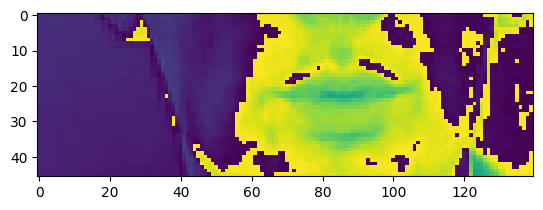

In [36]:
plt.imshow(val[0][0][35])
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video

In [37]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set white by c one soon'>

# **3. Design the Deep Neural Network**

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [39]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

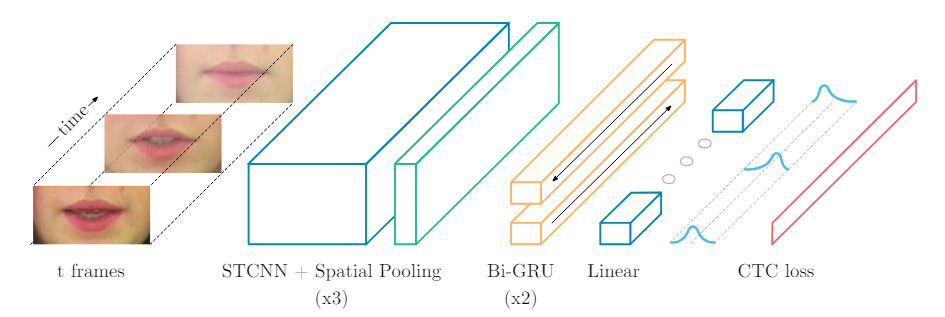

*   **LipNet architecture** A sequence of T frames is used as input, and is processed by 3 layers
of STCNN, each followed by a spatial max-pooling layer. The features extracted are processed by
2 Bi-GRUs; each time-step of the GRU output is processed by a linear layer and a softmax. This
end-to-end model is trained with CTC.


In [40]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [41]:
char_to_num.vocab_size()

40

In [42]:
5*17*75

6375

In [43]:
yhat = model.predict(val[0])

1/1 [==============================] - 15s 15s/step


In [44]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'88888888888888aaaaaaaaaaaaaaaa88888888888888888888888888888888888888aaaaaaa'>

In [45]:
yhat[0]

array([[0.02506956, 0.02532368, 0.01739012, ..., 0.02384461, 0.02869177,
        0.02334795],
       [0.02524308, 0.02624132, 0.0166348 , ..., 0.02367346, 0.02784845,
        0.02315191],
       [0.02517485, 0.02738713, 0.01626411, ..., 0.02387015, 0.02704719,
        0.02339865],
       ...,
       [0.02168335, 0.03577807, 0.0208487 , ..., 0.0242131 , 0.02703556,
        0.02512283],
       [0.02152027, 0.03488359, 0.02194611, ..., 0.02433235, 0.02663311,
        0.02547426],
       [0.02131919, 0.03352631, 0.02322174, ..., 0.02469384, 0.02594409,
        0.02587787]], dtype=float32)

In [46]:
yhat[0].shape

(75, 41)

In [47]:
tf.argmax(yhat[0],axis=1)

<tf.Tensor: shape=(75,), dtype=int64, numpy=
array([37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 37, 37, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        1,  1,  1,  1,  1,  1,  1])>

In [48]:
[num_to_char(x) for x in tf.argmax(yhat[0],axis=1)]

[<tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'8'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'a'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'a'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'a'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'a'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'a'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'a'>,


In [49]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'88888888888888aaaaaaaaaaaaaaaa88888888888888888888888888888888888888aaaaaaa'>

In [50]:
model.input_shape

(None, 75, 46, 140, 1)

In [51]:
model.output_shape

(None, 75, 41)

# **4. Setup Training Options and Train**

In [52]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [53]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")
    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [54]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [55]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [56]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)

In [57]:
schedule_callback = LearningRateScheduler(scheduler)

In [58]:
example_callback = ProduceExample(test)

# **Make a Prediction**

In [59]:
import gdown

In [60]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=92ea3337-2244-47a6-97bb-2d44f6e7caea
To: /content/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:00<00:00, 125MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [61]:
!pip install tensorflow==2.10 opencv-python matplotlib imageio gdown

In [62]:
model.load_weights('models/checkpoint')

In [63]:
test_data = test.as_numpy_iterator()

In [65]:
sample = test_data.next()

In [67]:
yhat = model.predict(sample[0])

1/1 [==============================] - 11s 11s/step


In [68]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'lay red in k four please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place sp blue at i six please'>]

In [69]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [70]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'lay red in k four please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place pblue at i six please'>]

# **Test on a video**

In [72]:
sample = load_data(tf.convert_to_tensor('/content/data/s1/bbaf3s.mpg'))

In [73]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f three soon'>]

In [74]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 6s 6s/step


In [77]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [79]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at j three soon'>]